#### Example:
GPflow for creating Brownian Motion Kernel:
- https://gpflow.readthedocs.io/en/master/notebooks/tailor/kernel_design.html

In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary, positive
from tensorflow_probability import bijectors as tfb
import pandas as pd
from gpflow.mean_functions import Constant
plt.style.use("ggplot")
%matplotlib inline

$k([t_1,t_2],[t_1',t_2']) = [w_1min(t_1,t_1')^{l_1}+w_2min(t_2,t_2')^{l_2}]^l$

In [2]:
# combined kernel
class Brownian_1d(gpflow.kernels.Kernel):
    def __init__(self,dim):
        self.dim = dim
        super().__init__() # 0: model paramerter x; 1: mesh t1; 2: mesh t2
#         sigmoid = tfb.Sigmoid(tf.cast(0,tf.float64), tf.cast(0.5,tf.float64))
#         self.variance = gpflow.Parameter(3, transform=positive(), dtype='float64')
#         self.w1 = gpflow.Parameter(0.3, transform=sigmoid, dtype='float64')
        self.l1 = 2 #gpflow.Parameter(1, transform=positive(), dtype='float64')
#         self.w2 = gpflow.Parameter(0.4, transform=sigmoid, dtype='float64')
#         self.l2 = gpflow.Parameter(0.6, transform=positive(), dtype='float64')
#         self.l = gpflow.Parameter(2.0, transform=positive(), dtype='float64')

    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        n1 = X.shape[0]
        n2 = X2.shape[0]

        temp1 = tf.reshape(tf.repeat(X[:,self.dim], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l1
        term1 = tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n2), shape=[n1,n2])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n1), shape=[n2,n1])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l2
#         term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         power = tf.ones_like(term1, dtype='float64') * self.l
        return term1 #tf.pow((term1 + term2),power) # this returns a 2D tensor
#         return self.variance * tf.pow((term1 + term2),power)  # this returns a 2D tensor


    def K_diag(self, X):
        
        n = X.shape[0]
        
        diag = (X[:,self.dim] ** self.l1)
        
        return tf.reshape(diag, (-1,))
        
#         X2 = X
#         n = X.shape[0]

#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l1
#         term1 = self.w1 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l2
#         term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         power = tf.ones_like(term1, dtype='float64') * self.l
# #         matrix = self.variance * tf.pow((term1 + term2),power)
#         matrix = tf.pow((term1 + term2),power)
        
#         return tf.linalg.diag_part(matrix.numpy()) # this returns a 1D tensor

In [3]:
# combined kernel
class Brownian_2d(gpflow.kernels.Kernel):
    def __init__(self,dim):
        self.dim = dim
        super().__init__(active_dims=self.dim.tolist()) # 0: model paramerter x; 1: mesh t1; 2: mesh t2
        sigmoid = tfb.Sigmoid(tf.cast(0,tf.float64), tf.cast(0.5,tf.float64))
#         self.variance = gpflow.Parameter(3, transform=positive(), dtype='float64')
        self.w1 = gpflow.Parameter(0.3, transform=sigmoid, dtype='float64')
        self.l1 = gpflow.Parameter(0.5, transform=positive(), dtype='float64')
        self.w2 = gpflow.Parameter(0.4, transform=sigmoid, dtype='float64')
        self.l2 = gpflow.Parameter(0.6, transform=positive(), dtype='float64')
        self.l = gpflow.Parameter(2.0, transform=positive(), dtype='float64')

    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        n1 = X.shape[0]
        n2 = X2.shape[0]

        temp1 = tf.reshape(tf.repeat(X[:,self.dim[0]], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim[0]], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l1
        term1 = self.w1 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
        temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l2
        term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
        power = tf.ones_like(term1, dtype='float64') * self.l
        return tf.pow((term1 + term2),power) # this returns a 2D tensor
#         return self.variance * tf.pow((term1 + term2),power)  # this returns a 2D tensor


    def K_diag(self, X):
        
        n = X.shape[0]
        
        diag = (self.w1 * X[:,self.dim[0]] ** self.l1 + self.w2 * X[:,self.dim[1]] ** self.l2) ** self.l
        
        return tf.reshape(diag, (-1,))
        
#         X2 = X
#         n = X.shape[0]

#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l1
#         term1 = self.w1 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l2
#         term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         power = tf.ones_like(term1, dtype='float64') * self.l
# #         matrix = self.variance * tf.pow((term1 + term2),power)
#         matrix = tf.pow((term1 + term2),power)
        
#         return tf.linalg.diag_part(matrix.numpy()) # this returns a 1D tensor

In [4]:
# combined kernel
class Brownian_3d(gpflow.kernels.Kernel):
    def __init__(self,dim):
        self.dim = dim
        super().__init__(active_dims=self.dim.tolist()) # 0: model paramerter x; 1: mesh t1; 2: mesh t2
        sigmoid = tfb.Sigmoid(tf.cast(0,tf.float64), tf.cast(0.33333,tf.float64))
#         self.variance = gpflow.Parameter(3, transform=positive(), dtype='float64')
        self.w1 = gpflow.Parameter(0.3, transform=sigmoid, dtype='float64')
        self.l1 = 2 #gpflow.Parameter(0.5, transform=positive(), dtype='float64')
        self.w2 = gpflow.Parameter(0.3, transform=sigmoid, dtype='float64')
        self.l2 = 2 #gpflow.Parameter(0.6, transform=positive(), dtype='float64')
        self.w3 = gpflow.Parameter(0.3, transform=sigmoid, dtype='float64')
        self.l3 = 2 #gpflow.Parameter(0.5, transform=positive(), dtype='float64')
        self.l = 1 #gpflow.Parameter(2.0, transform=positive(), dtype='float64')

    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        n1 = X.shape[0]
        n2 = X2.shape[0]

        temp1 = tf.reshape(tf.repeat(X[:,self.dim[0]], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim[0]], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l1
        term1 = self.w1 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
        temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l2
        term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
        temp1 = tf.reshape(tf.repeat(X[:,self.dim[2]], repeats=n2), shape=[n1,n2])
        temp1 = tf.cast(temp1, dtype='float64')
        temp2 = tf.reshape(tf.repeat(X2[:,self.dim[2]], repeats=n1), shape=[n2,n1])
        temp2 = tf.cast(temp2, dtype='float64')
        power = tf.ones_like(temp1, dtype='float64') * self.l3
        term3 = self.w3 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
                                power)
        
        power = tf.ones_like(term1, dtype='float64') * self.l
        return tf.pow((term1 + term2 + term3),power) # this returns a 2D tensor
#         return self.variance * tf.pow((term1 + term2),power)  # this returns a 2D tensor


    def K_diag(self, X):
        
        n = X.shape[0]
#         X = X.to_numpy()
        
        diag = (self.w1 * X[:,self.dim[0]] ** self.l1 + self.w2 * X[:,self.dim[1]] ** self.l2 + self.w3 * X[:,self.dim[2]] ** self.l3) ** self.l
        
        return tf.reshape(diag, (-1,))
        
#         X2 = X
#         n = X.shape[0]

#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[0]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l1
#         term1 = self.w1 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         temp1 = tf.reshape(tf.repeat(X[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp1 = tf.cast(temp1, dtype='float64')
#         temp2 = tf.reshape(tf.repeat(X2[:,self.dim[1]], repeats=n), shape=[n,n])
#         temp2 = tf.cast(temp2, dtype='float64')
#         power = tf.ones_like(temp1, dtype='float64') * self.l2
#         term2 = self.w2 * tf.pow(tf.minimum(temp1, tf.transpose(temp2)),\
#                                 power)
        
#         power = tf.ones_like(term1, dtype='float64') * self.l
# #         matrix = self.variance * tf.pow((term1 + term2),power)
#         matrix = tf.pow((term1 + term2),power)
        
#         return tf.linalg.diag_part(matrix.numpy()) # this returns a 1D tensor

Read in data:

In [5]:
from numpy import random
filename = 'TestDatafromHenry/Ex2_results_M3.txt'
df3 = np.loadtxt(filename, delimiter=' ')
df3 = pd.DataFrame(df3)
df3["t1"] = (1/df3[3])**(1/3)
df3["t2"] = df3["t1"] #np.random.uniform(0,1,len(df3)) 
df3["t3"] = df3["t1"] #np.random.uniform(0,1,len(df3)) 
df3 = df3.drop([3], axis=1)
df3 = df3.rename(columns = {0:"x1", 1:"x2", 2:"x3", 4:"y"})

In [6]:
filename = 'TestDatafromHenry/Ex2_results_test.txt'
dft = np.loadtxt(filename, delimiter=' ')
dft = pd.DataFrame(dft)
dft = dft.rename(columns = {0:"x1", 1:"x2", 2:"x3", 3:"y"})
dft["t1"] = 0.025
dft["t2"] = 0.025
dft["t3"] = 0.005

In [7]:
dft

,x1,x2,x3,y,t1,t2,t3
0,0.745,0.516667,0.350000,35.540559,0.025,0.025,0.005
1,0.205,0.916667,0.650000,52.045767,0.025,0.025,0.005
2,0.925,0.816667,0.950000,180.376000,0.025,0.025,0.005
3,0.415,0.216667,0.850000,0.679783,0.025,0.025,0.005
4,0.265,0.083333,0.583333,0.047406,0.025,0.025,0.005
5,0.475,0.350000,0.150000,5.478580,0.025,0.025,0.005
6,0.295,0.716667,0.116667,56.541967,0.025,0.025,0.005
7,0.955,0.416667,0.183333,21.186533,0.025,0.025,0.005
8,0.355,0.150000,0.683333,0.116495,0.025,0.025,0.005
9,0.625,0.316667,0.483333,4.152163,0.025,0.025,0.005


In [8]:
X = df3[["t1","t2","t3","x1","x2","x3"]]#.iloc[0:3]
Y = df3["y"]#.iloc[0:3]
Xtest = dft[["t1","t2","t3","x1","x2","x3"]]#.iloc[0:3]
Ytest = dft["y"]#.iloc[0:3]
X = X.to_numpy()
Y = Y.to_numpy().reshape(-1,1)
Xtest = Xtest.to_numpy()
Ytest = Ytest.to_numpy().reshape(-1,1)

In [9]:
# kernel composition
k_BM = Brownian_3d(dim=np.array([0,1,2]))
k_x_s = gpflow.kernels.SquaredExponential(active_dims=[3,4,5], lengthscales=[1,1,1]) # first dimension: model parameter
k_x_ns = gpflow.kernels.SquaredExponential(active_dims=[3,4,5], lengthscales=[1,1,1])
k = k_x_s + k_x_ns * k_BM

2021-12-05 00:46:26.757900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
k

name,class,transform,prior,trainable,shape,dtype,value
Sum.kernels[0].variance,Parameter,Softplus,,True,(),float64,1.0
Sum.kernels[0].lengthscales,Parameter,Softplus,,True,"(3,)",float64,[1. 1. 1.]
Sum.kernels[1].kernels[0].variance,Parameter,Softplus,,True,(),float64,1.0
Sum.kernels[1].kernels[0].lengthscales,Parameter,Softplus,,True,"(3,)",float64,[1. 1. 1.]
Sum.kernels[1].kernels[1].w1,Parameter,Sigmoid,,True,(),float64,0.3
Sum.kernels[1].kernels[1].w2,Parameter,Sigmoid,,True,(),float64,0.3
Sum.kernels[1].kernels[1].w3,Parameter,Sigmoid,,True,(),float64,0.3


In [93]:
np.random.seed(42)

# kernel composition
k_BM = Brownian_3d(dim=np.array([0,1,2]))
k_x_s = gpflow.kernels.SquaredExponential(active_dims=[3,4,5], lengthscales=[0.1,0.1,0.1], variance=1) # first dimension: model parameter
k_x_ns = gpflow.kernels.SquaredExponential(active_dims=[3,4,5], lengthscales=[0.1,0.1,0.1], variance=1)
k = k_x_s + k_x_ns * k_BM

def objective_closure():
    return -m.log_marginal_likelihood()

m = gpflow.models.GPR(data=(X, Y), mean_function=Constant(np.mean(Y)), kernel=k, noise_variance=1e-4)

# 1st optimization method: https://github.com/Ryan-Rhys/The-Photoswitch-Dataset/blob/master/examples/gp_regression_on_molecules.ipynb
opt = gpflow.optimizers.Scipy()

#     for _ in range(100):
opt.minimize(objective_closure, m.trainable_variables, options=dict(maxiter=100))

# # 2nd optimization method: https://gpflow.readthedocs.io/en/develop/notebooks/advanced/gps_for_big_data.html
# optimizer = tf.optimizers.Adam()

# @tf.function
# def optimization_step():
#     optimizer.minimize(m.training_loss, m.trainable_variables)
    
# for step in range(200):
#         optimization_step()

print_summary(m, fmt="notebook")

mean, var = m.predict_f(Xtest)

# plt.plot(X[:,2], Y, "kx", mew=2, color='gray', label='Training Points')
# plt.plot(X_test[:,2], Y_test, color='b', label='True Test Points')
# (line,) = plt.plot(X_test[:,2], mean, lw=2, label='Predictive Mean')
# _ = plt.fill_between(
#     X_test[:, 2],
#     mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
#     mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
#     color=line.get_color(),
#     alpha=0.2, label='95% Predictive Interval'
# )
# plt.legend()
# plt.title('Proposed Model')

name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.c,Parameter,Identity,,True,(),float64,164.20096969188413
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,31142.922663552385
GPR.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,"(3,)",float64,[ 0.85862717 0.76371495 20121.06749439]
GPR.kernel.kernels[1].kernels[0].variance,Parameter,Softplus,,True,(),float64,6.697680881177473
GPR.kernel.kernels[1].kernels[0].lengthscales,Parameter,Softplus,,True,"(3,)",float64,[0.06876631 0.00581484 0.00006432]
GPR.kernel.kernels[1].kernels[1].w1,Parameter,Sigmoid,,True,(),float64,0.333329985846943
GPR.kernel.kernels[1].kernels[1].w2,Parameter,Sigmoid,,True,(),float64,0.333329985846943
GPR.kernel.kernels[1].kernels[1].w3,Parameter,Sigmoid,,True,(),float64,0.333329985846943
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1e-06


predict on training set

In [42]:
mean_train, var_train = m.predict_f(X)

In [43]:
vec = np.hstack([np.abs(mean_train.numpy()-Y),Y])

In [44]:
np.set_printoptions(suppress=True)
print(vec)

[[  0.01183116   4.469205  ]
 [  0.02741767   0.03467545]
 [  0.04914919   1.52059867]
 [  0.00592775  69.54194673]
 [  0.01451964  31.89531875]
 [  0.03490508   0.00889046]
 [  0.03945197   1.59223167]
 [  0.00066125  12.34544552]
 [  0.01225557 150.41931874]
 [  0.14418956  72.61095187]
 [  0.15961431 116.6509935 ]
 [  0.0297073    0.07835538]
 [  0.10327194 160.09641665]
 [  0.09777145  58.22951528]
 [  0.03209749  10.91328009]
 [  0.00873287   0.74044499]
 [  0.06961353  51.12838582]
 [  0.02170404 150.37164722]]


In [45]:
mean6, var6 = m.predict_f(Xtest[6:7])
np.abs(mean6.numpy()-Ytest[6])

array([[16.57629064]])

In [46]:
Xtest[6:7]

array([[0.025     , 0.025     , 0.005     , 0.295     , 0.71666667,
        0.11666667]])

In [83]:
np.sqrt(np.mean((mean.numpy()-Ytest)**2)) #-> slides

3.4191719456943863

In [84]:
np.mean(np.abs(mean.numpy()-Ytest))

1.7760854076452126

In [91]:
np.median((mean.numpy()-Ytest)**2).reshape(1,-1) # MSE (including outliers) #-> slides

array([[1.35475713]])

In [90]:
al_error2=(mean.numpy()-Ytest)**2
excl_7_error2 = np.delete(al_error2,6)
np.mean(excl_7_error2)

2.6153132626019526

In [50]:
np.max(np.abs(mean.numpy()-Ytest)) # max abs error

16.576290642656673

In [51]:
np.mean(var[:,0])

0.22434795561675855

Text(0.5, 1.0, 'prediction vs truth')

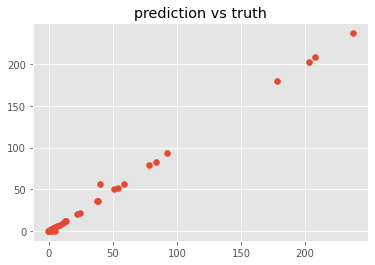

In [94]:
plt.scatter(mean.numpy(), Ytest) # prediction vs truth
plt.title('prediction vs truth')

Text(0.5, 1.0, 'absolute error')

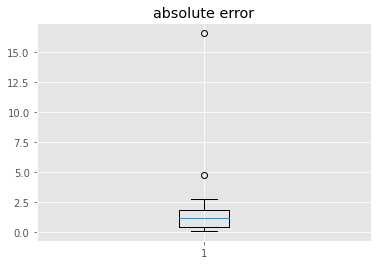

In [95]:
plt.boxplot(np.abs(mean.numpy()-Ytest)) # plot of abs error
plt.title('absolute error')

Text(0.5, 1.0, 'error^2')

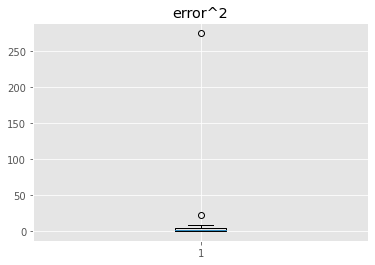

In [96]:
plt.boxplot((mean.numpy()-Ytest)**2) # plot of error^2
plt.title('error^2')

In [97]:
(mean.numpy()-Ytest)**2 # 2 outliers: 7th, 23rd

array([[  5.96165693],
       [  4.11032199],
       [  6.51138025],
       [  0.00651393],
       [  0.15248392],
       [  1.35886378],
       [274.87801921],
       [  7.54334794],
       [  0.04951131],
       [  0.87060772],
       [  1.31019577],
       [  0.16286706],
       [  1.83702744],
       [  0.57883201],
       [  3.50957958],
       [  0.84989938],
       [  0.15916415],
       [  1.35065049],
       [  2.35770415],
       [  2.67748766],
       [  0.00822748],
       [  0.44689955],
       [ 22.22699292],
       [  0.04102242],
       [  3.21041705],
       [  1.8754945 ],
       [  4.40969387],
       [  0.19767782],
       [  0.01864884],
       [  2.05091472]])

Compare to 3-d Gaussian kernel: (6-d not invertible (3 columns the same))

In [26]:
# # random initialization
# from gpflow.mean_functions import Constant
# np.random.seed(42)
# X_m = X[:,[3,4,5]]

# # Hyper-parameters initialization
# def init_hyper_parameters(seed_value):
#     hyper_parameters = {}   
#     hyper_parameters['ls'] = np.random.uniform(0. , 10., size=3)    
#     tf.compat.v1.get_default_graph()
#     tf.compat.v1.set_random_seed(seed_value)
#     tf.random.set_seed(seed_value)
#     gpflow.config.set_default_float(np.float64)   
#     return hyper_parameters

# def objective_closure():
#     return -m2.log_marginal_likelihood()

# for count in range(100):
    
#     k2 = gpflow.kernels.SquaredExponential(lengthscales=init_hyper_parameters(count)['ls'])

#     m2 = gpflow.models.GPR(data=(X_m, Y), mean_function=Constant(np.mean(Y)), kernel=k2, noise_variance=1)

#     opt = gpflow.optimizers.Scipy()

# #     for _ in range(100):
#     opt.minimize(objective_closure, m2.trainable_variables, options=dict(maxiter=100))

# #     optimizer = tf.optimizers.Adam()

# #     @tf.function
# #     def optimization_step():
# #         optimizer.minimize(m2.training_loss, m2.trainable_variables)

# #     for step in range(500):
# #             optimization_step()

#     print_summary(m2, fmt="notebook")
#     print(m2.log_marginal_likelihood().numpy())
    
#     if count == 0:
#         m_temp = m2
#     else:
#         if m2.log_marginal_likelihood().numpy()>m_temp.log_marginal_likelihood().numpy():
#             m_temp = m2
    
# mean2, var2 = m_temp.predict_y(Xtest[:,[3,4,5]])    
# print(m_temp.log_marginal_likelihood().numpy())
# print_summary(m_temp, fmt="notebook")

# # plt.plot(X[:,2], Y, "kx", mew=2, color='gray', label='Training Points')
# # plt.plot(X_test[:,2], Y_test, color='b', label='True Test Points')
# # (line,) = plt.plot(X_test[:,2], mean2, lw=2, label='Predictive Mean')
# # _ = plt.fill_between(
# #     X_test[:, 2],
# #     mean2[:, 0] - 1.96 * np.sqrt(var2[:, 0]),
# #     mean2[:, 0] + 1.96 * np.sqrt(var2[:, 0]),
# #     color=line.get_color(),
# #     alpha=0.2, label='95% Predictive Interval'
# # )
# # plt.legend()
# # plt.title('Gaussian Kernel')

In [27]:
from gpflow.mean_functions import Constant
np.random.seed(42)
X_m = X[:,[3,4,5]]


def objective_closure():
    return -m2.log_marginal_likelihood()

    
k2 = gpflow.kernels.SquaredExponential(lengthscales=[1,1,1])

m2 = gpflow.models.GPR(data=(X_m, Y), mean_function=Constant(np.mean(Y)), kernel=k2, noise_variance=1)

opt = gpflow.optimizers.Scipy()

#     for _ in range(100):
opt.minimize(objective_closure, m2.trainable_variables, options=dict(maxiter=100))

#     optimizer = tf.optimizers.Adam()

#     @tf.function
#     def optimization_step():
#         optimizer.minimize(m2.training_loss, m2.trainable_variables)

#     for step in range(500):
#             optimization_step()

print_summary(m2, fmt="notebook")
print(m2.log_marginal_likelihood().numpy())
mean2, var2 = m2.predict_f(Xtest[:,[3,4,5]])    


# plt.plot(X[:,2], Y, "kx", mew=2, color='gray', label='Training Points')
# plt.plot(X_test[:,2], Y_test, color='b', label='True Test Points')
# (line,) = plt.plot(X_test[:,2], mean2, lw=2, label='Predictive Mean')
# _ = plt.fill_between(
#     X_test[:, 2],
#     mean2[:, 0] - 1.96 * np.sqrt(var2[:, 0]),
#     mean2[:, 0] + 1.96 * np.sqrt(var2[:, 0]),
#     color=line.get_color(),
#     alpha=0.2, label='95% Predictive Interval'
# )
# plt.legend()
# plt.title('Gaussian Kernel')

name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.c,Parameter,Identity,,True,(),float64,192.80500726584737
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,40581.36265166042
GPR.kernel.lengthscales,Parameter,Softplus,,True,"(3,)",float64,[ 0.83497377 0.75341196 4183.32080749]
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1e-06


-63.38304725071134


In [28]:
np.sqrt(np.mean((mean2.numpy()-Ytest)**2))

3.521590230565627

In [29]:
np.max(np.abs(mean2.numpy()-Ytest))

16.61030900897326

In [30]:
np.mean(var2)

0.08340076415576429

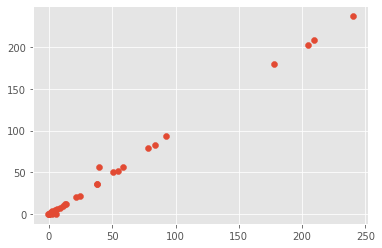

In [31]:
plt.scatter(mean2.numpy(), Ytest)

{'whiskers': [<matplotlib.lines.Line2D at 0x169563af0>,
 'caps': [<matplotlib.lines.Line2D at 0x169563fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169563790>],
 'medians': [<matplotlib.lines.Line2D at 0x169545670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1695459a0>],
 'means': []}

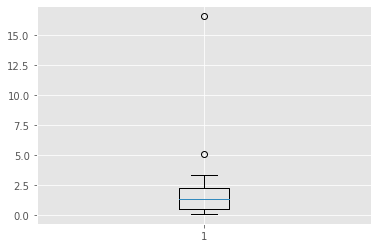

In [32]:
plt.boxplot(np.abs(mean2.numpy()-Ytest))

TEST

In [33]:
import GPy
import GPy.kern

In [34]:
X_m = X[:,[3,4,5]]
k = GPy.kern.RBF(input_dim=3, ARD=True) 
m = GPy.models.GPRegression(X_m,Y,k)
m.optimize()
mu,var = m.predict(Xtest[:,[3,4,5]])
print(np.sqrt(np.mean((mu-Ytest)**2)))
print(m)

3.530832216342132

Name : GP regression
Objective : 64.38099656152768
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |       64892.70649535724  |      +ve      |        
  rbf.lengthscale          |                    (3,)  |      +ve      |        
  Gaussian_noise.variance  |  5.562684646268137e-309  |      +ve      |        


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


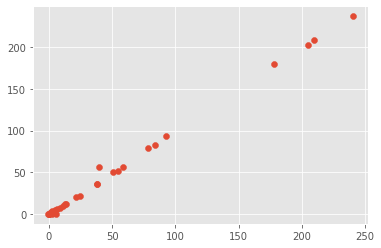

In [35]:
plt.scatter(mu,Ytest)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c77beb0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c784550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c77bbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c784c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c784f70>],
 'means': []}

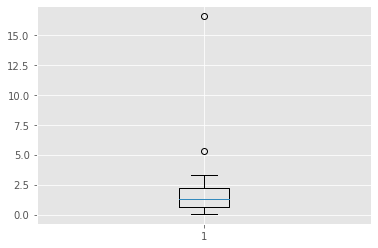

In [36]:
plt.boxplot(np.abs(mu-Ytest))

In [37]:
x = np.array([-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0]).reshape(-1,1)
y = np.sin(x)
xtest = np.linspace(-3,3,100).reshape(-1,1)

In [38]:
k = gpflow.kernels.SquaredExponential()
m = gpflow.models.GPR((x, y), kernel=k)
opt = gpflow.optimizers.Scipy()
opt.minimize(m.training_loss, variables=m.trainable_variables)
print_summary(m, fmt="notebook")

mean, var = m.predict_y(xtest)

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,2.74454
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.48535
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1e-06


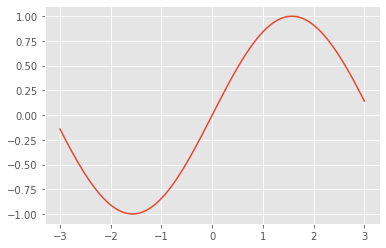

In [39]:
plt.plot(xtest,mean)